In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
Data = np.zeros([34,365])
# os.chdir()
# current_directory = os.getcwd()
# directory_path = os.path.join('./PHU_data',current_directory)
PHU_path = './../PHU_data'
files = os.listdir(PHU_path)

for ii in range(0,34):
  if ii < 9:
    target_name_part = "0"+str(ii+1)+"-"
  else:
    target_name_part = str(ii+1)+"-"
  for file in files:
      if target_name_part in file:
          target_file = file
          break
  else:
      raise FileNotFoundError(f"Could not find any file containing '{target_name_part}'.")

  filepath = os.path.join(PHU_path,target_file)
  Data[ii,:] = np.genfromtxt(filepath, delimiter=',')

population_by_phu = np.genfromtxt(f'{PHU_path}/population_by_phu.csv', delimiter=',')

In [3]:
# [t_brandon,S,E,I,R,D,b] = np.loadtxt('./../../data/brandon_synthetic_truth_case2.dat')

synthdata = np.loadtxt('/Users/sudhipv/documents/coupled_compartment/data/coupled_synth_data_r100.csv', delimiter=',')

beta_synth = np.loadtxt('/Users/sudhipv/documents/coupled_compartment/data/coupled_true_synthetic_beta.csv', delimiter=',')

synth_truth_0 = np.loadtxt('/Users/sudhipv/documents/coupled_compartment/data/coupled_toronto_synthetic_truth_all.csv', delimiter=',')


synth_truth_1 = np.loadtxt('/Users/sudhipv/documents/coupled_compartment/data/coupled_durham_synthetic_truth_all.csv', delimiter=',')

/var/folders/lr/4h04vl_92s3d0hrwg37l8g740000gn/T/ipykernel_39980/3501297235.py:22: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-r" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(tlist,synth_truth_0[:,2],'-r', linestyle='--', linewidth=2, label=r'Manual fit')


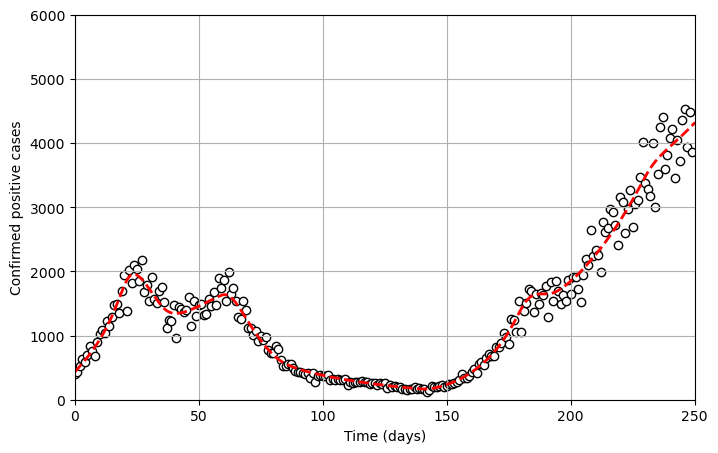

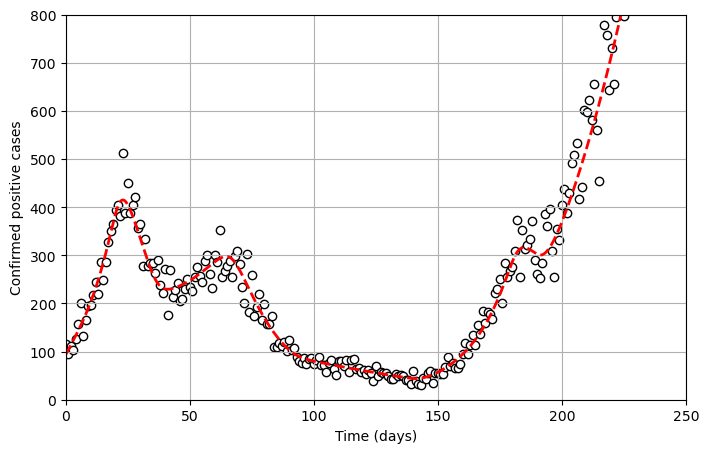

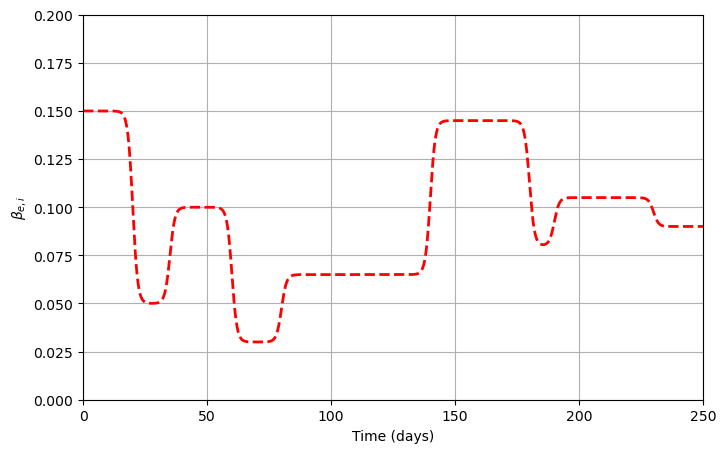

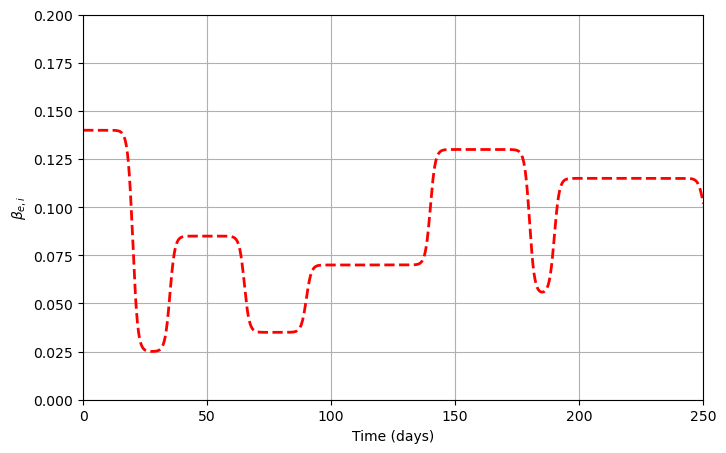

In [16]:
#!/usr/bin/python
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt


tdata = np.arange(0,365)


Ndays = 272
dt = 1/10 # timestep
tlist = np.arange(0,Ndays,dt) # Define time axis



#### CHANGE HERE ACCORDING TO PHU NUMBER ####
########################################## ####

plt.figure(2,figsize=(8,5))
plt.plot(tlist,synth_truth_0[:,2],'-r', linestyle='--', linewidth=2, label=r'Manual fit')
# plt.scatter(tdata[:180],Data[29,:180],color='w',edgecolors='k',zorder=1,alpha=1,label='Data')
# plt.plot(t_brandon,I,'k.', linewidth=2, label=r'True model')
plt.scatter(tdata[:250],synthdata[0:250,0],color='w',edgecolors='k',zorder=1,alpha=1,label='Data')

# plt.legend()
plt.ylim([0,6000])
# x_positions = [20,35,60,80,140]
# ymin, ymax = plt.gca().get_ylim()
# plt.vlines(x_positions, ymin=ymin, ymax=ymax, colors='g', linestyles='--', linewidth=2)  # Adjust ymin and ymax as needed

plt.grid(True)
plt.xlabel('Time (days)')
plt.ylabel('Confirmed positive cases')
plt.xlim([0,250])
# plt.title("Toronto")
plt.savefig('./figs/synth_data_toronto.pdf',  bbox_inches='tight')
# plt.ylim([0,0.0005])




plt.figure(3,figsize=(8,5))
plt.plot(tlist,synth_truth_1[:,2],'r', linestyle='--', linewidth=2, label=r'Manual fit')
# plt.scatter(tdata[:180],Data[29,:180],color='w',edgecolors='k',zorder=1,alpha=1,label='Data')
# plt.plot(t_brandon,I,'k.', linewidth=2, label=r'True model')
plt.scatter(tdata[:250],synthdata[0:250,1],color='w',edgecolors='k',zorder=1,alpha=1,label='Data')
# plt.legend()
plt.ylim([0,800])
# x_positions = [20,35,60,80,140]
# ymin, ymax = plt.gca().get_ylim()
# plt.vlines(x_positions, ymin=ymin, ymax=ymax, colors='g', linestyles='--', linewidth=2)  # Adjust ymin and ymax as needed
plt.grid(True)
plt.xlabel('Time (days)')
plt.ylabel('Confirmed positive cases')
plt.xlim([0,250])
# plt.title("Durham")
plt.savefig('./figs/synth_data_durham.pdf',  bbox_inches='tight')
# plt.ylim([0,0.0005])



dt = 0.1
tmoh = np.arange(0,272,dt)


plt.figure(4,figsize=(8,5))
plt.plot(tmoh,beta_synth[:,0],'r', linestyle='--', linewidth=2, label=r'Beta Parameter')
# plt.plot(t_brandon,b,'g-', label=r'True Beta')
plt.grid(True)
# ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
# plt.ylim([0,0.145])
# x_positions = [20,35,60,80,140]
# ymin, ymax = plt.gca().get_ylim()
# plt.vlines(x_positions, ymin=ymin, ymax=ymax, colors='g', linestyles='--',linewidth=2)  # Adjust ymin and ymax as needed
plt.xlabel('Time (days)')
plt.ylabel(r'$\beta_{e,i}$')
plt.ylim([0,0.2])
plt.xlim([0,250])
# plt.title("Toronto")
plt.savefig('./figs/beta_synth_toronto.pdf',  bbox_inches='tight')
# plt.ylim([0,0.25])



plt.figure(5,figsize=(8,5))
plt.plot(tmoh,beta_synth[:,1],'r', linestyle='--', linewidth=2, label=r'Beta Parameter')
# plt.plot(t_brandon,b,'g-', label=r'True Beta')
plt.grid(True)
# ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
# plt.ylim([0,0.145])
# x_positions = [20,35,60,80,140]
# ymin, ymax = plt.gca().get_ylim()
# plt.vlines(x_positions, ymin=ymin, ymax=ymax, colors='g', linestyles='--',linewidth=2)  # Adjust ymin and ymax as needed
plt.xlabel('Time (days)')
plt.ylabel(r'$\beta_{e,i}$')
plt.ylim([0,0.2])
plt.xlim([0,250])
# plt.title("Toronto")
plt.savefig('./figs/beta_synth_durham.pdf',  bbox_inches='tight')
# plt.ylim([0,0.25])
